### Getting the iris dataset

In [69]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#setting the random seed
np.random.seed(42)

#get data and load to pandas
iris_data_set = pd.read_csv("datasets/iris.data.txt", 
                  names = ["feature1", "feature2", "feature3", "feature4", "Iris"])
print("feature 1: sepal length in cm")
print("feature 2: sepal width in cm")
print("feature 3: petal length in cm")
print("feature 4: petal width in cm")
print("Iris: Setosa, Veriscolour, Virginica")

feature 1: sepal length in cm
feature 2: sepal width in cm
feature 3: petal length in cm
feature 4: petal width in cm
Iris: Setosa, Veriscolour, Virginica


### Exploring the dataset

In [53]:
print(iris_data_set)

     feature1  feature2  feature3  feature4            Iris
0         5.1       3.5       1.4       0.2     Iris-setosa
1         4.9       3.0       1.4       0.2     Iris-setosa
2         4.7       3.2       1.3       0.2     Iris-setosa
3         4.6       3.1       1.5       0.2     Iris-setosa
4         5.0       3.6       1.4       0.2     Iris-setosa
5         5.4       3.9       1.7       0.4     Iris-setosa
6         4.6       3.4       1.4       0.3     Iris-setosa
7         5.0       3.4       1.5       0.2     Iris-setosa
8         4.4       2.9       1.4       0.2     Iris-setosa
9         4.9       3.1       1.5       0.1     Iris-setosa
10        5.4       3.7       1.5       0.2     Iris-setosa
11        4.8       3.4       1.6       0.2     Iris-setosa
12        4.8       3.0       1.4       0.1     Iris-setosa
13        4.3       3.0       1.1       0.1     Iris-setosa
14        5.8       4.0       1.2       0.2     Iris-setosa
15        5.7       4.4       1.5       

In [54]:
print(iris_data_set.shape)

(150, 5)


In [55]:
#display info about the dataset
iris_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
feature1    150 non-null float64
feature2    150 non-null float64
feature3    150 non-null float64
feature4    150 non-null float64
Iris        150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [56]:
iris_data_set.describe()

,feature1,feature2,feature3,feature4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


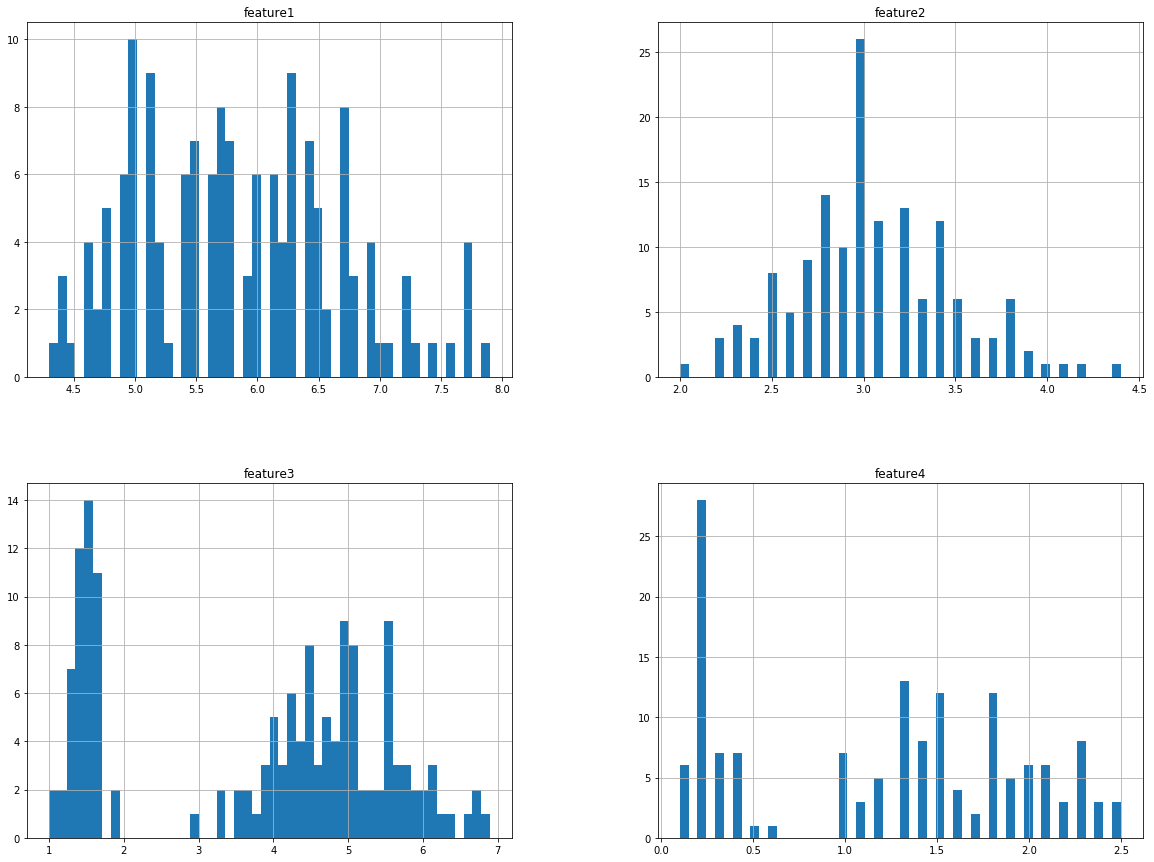

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
iris_data_set.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()


### Create test set

##### Create test set with random splitting

In [58]:
#random splitting
#split get test data set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(iris_data_set, test_size=0.2, random_state=42)

#### Create a stratified test set because dataset is small

#### Summary Statistics:

| Correlation Matrix | Min | Max | Mean | SD   | Class   |
|--------------------|-----|-----|------|------|---------|
| sepal length:      | 4.3 | 7.9 | 5.84 | 0.83 | 0.7826  |
| sepal width:       | 2.0 | 4.4 | 3.05 | 0.43 | -0.4194 |
| petal length:      | 1.0 | 6.9 | 3.76 | 1.76 | 0.9490  |
| petal width:       | 0.1 | 2.5 | 1.20 | 0.76 | 0.9565  |

This shows that there is a high correlation between petal length and width to the type of flower it is. feature 3 and 4

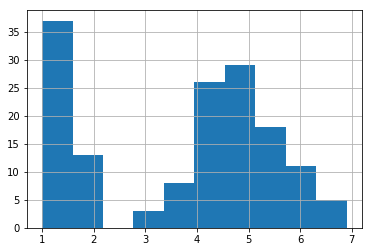

In [193]:
iris_data_set["feature3"].hist()

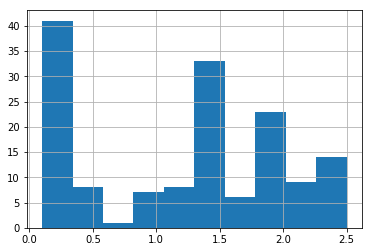

In [194]:
iris_data_set["feature4"].hist()

Splits feature 4 into 5 categories so that we can stratify the data based on petal width because it has the highest correlation

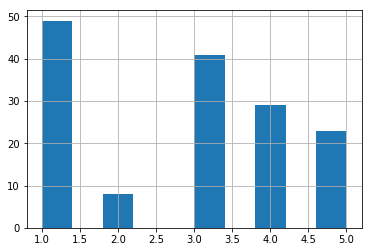

In [195]:
iris_data_set["feature4_cat"] = np.ceil(iris_data_set["feature4"]/0.5)
iris_data_set["feature4_cat"].hist()

Stratifying and splitting the training and test set

In [196]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(iris_data_set, iris_data_set["feature4_cat"]):
    strat_train_set = iris_data_set.loc[train_index]
    strat_test_set = iris_data_set.loc[test_index]

### Visualize the dataset

In [197]:
# from matplotlib import pyplot as plt

# x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
# y = [125, 32, 54, 253, 67, 87, 233, 56, 67]

# color = [str(item/255.) for item in y]

# plt.scatter(x, y, s=500, c=color)
color = []
color_to_num =  {"Iris-setosa":50, "Iris-versicolor":100, "Iris-virginica": 150}
color_to_color = {"Iris-setosa":"red", "Iris-versicolor":"green", "Iris-virginica": "blue"}
for i in iris_data_set["Iris"]:
    color.append(color_to_color[i])

In [198]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("feature4_cat", axis=1, inplace=True)

In [199]:
iris_data_set_stratified = strat_train_set.copy()
iris_data_set_stratified["feature5"] = iris_data_set_stratified["feature1"]/iris_data_set_stratified["feature2"]
iris_data_set_stratified["feature6"] = iris_data_set_stratified["feature3"]/iris_data_set_stratified["feature4"]

Text(0,0.5,'petal length')

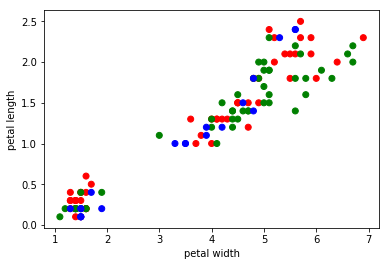

In [200]:
plt.scatter(iris_data_set_stratified["feature3"], iris_data_set_stratified["feature4"], c=color)
plt.xlabel("petal width")
plt.ylabel("petal length")

In [201]:
iris_data_set_stratified


,feature1,feature2,feature3,feature4,Iris,feature5,feature6
8,4.4,2.9,1.4,0.2,Iris-setosa,1.517241,7.000000
118,7.7,2.6,6.9,2.3,Iris-virginica,2.961538,3.000000
147,6.5,3.0,5.2,2.0,Iris-virginica,2.166667,2.600000
30,4.8,3.1,1.6,0.2,Iris-setosa,1.548387,8.000000
19,5.1,3.8,1.5,0.3,Iris-setosa,1.342105,5.000000
2,4.7,3.2,1.3,0.2,Iris-setosa,1.468750,6.500000
143,6.8,3.2,5.9,2.3,Iris-virginica,2.125000,2.565217
43,5.0,3.5,1.6,0.6,Iris-setosa,1.428571,2.666667
112,6.8,3.0,5.5,2.1,Iris-virginica,2.266667,2.619048
120,6.9,3.2,5.7,2.3,Iris-virginica,2.156250,2.478261


Text(0,0.5,'petal')

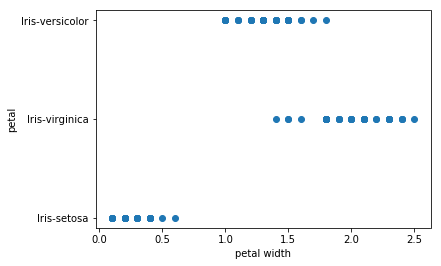

In [202]:
plt.scatter(iris_data_set_stratified["feature4"], iris_data_set_stratified["Iris"], alpha=1)
plt.xlabel("petal width")
plt.ylabel("petal")

Text(0,0.5,'petal')

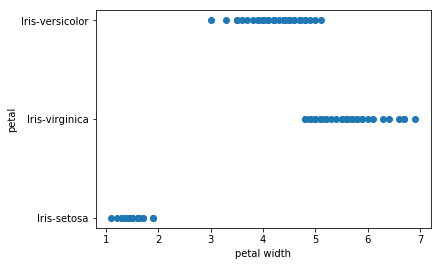

In [203]:
plt.scatter(iris_data_set_stratified["feature3"], iris_data_set_stratified["Iris"], alpha=1)
plt.xlabel("petal width")
plt.ylabel("petal")

Text(0,0.5,'petal')

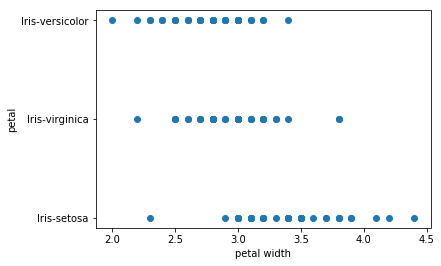

In [204]:
plt.scatter(iris_data_set_stratified["feature2"], iris_data_set_stratified["Iris"], alpha=1)
plt.xlabel("petal width")
plt.ylabel("petal")

Text(0,0.5,'petal')

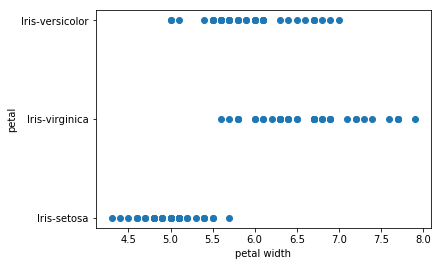

In [205]:
plt.scatter(iris_data_set_stratified["feature1"], iris_data_set_stratified["Iris"], alpha=1)
plt.xlabel("petal width")
plt.ylabel("petal")

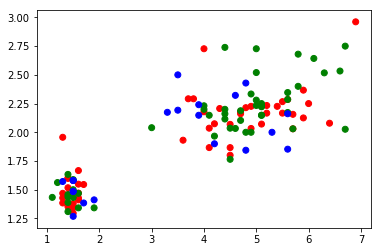

In [206]:
plt.scatter(iris_data_set_stratified["feature3"], iris_data_set_stratified["feature5"], c=color, alpha=1)

Training a model and it looks like decision trees are good for this

In [251]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris_data_set_stratified.values[:, 2:4])
print(scaled_data.shape)

from sklearn.tree import DecisionTreeClassifier

dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(scaled_data, iris_data_set_stratified["Iris"].values)
dtc_model.predict(scaled_data[:1])

(120, 2)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array(['Iris-setosa'], dtype=object)

In [242]:
from sklearn.model_selection import cross_val_score
cross_val_score(dtc_model, scaled_data, iris_data_set_stratified["Iris"].values, cv=10)

array([1.        , 1.        , 1.        , 0.91666667, 0.91666667,
       0.83333333, 0.83333333, 1.        , 1.        , 0.91666667])

In [260]:
test_set = strat_test_set.copy()
scaled_test_set = scaler.fit_transform(test_set.values[:, 2:4])
test_label = test_set["Iris"].values
predictions = dtc_model.predict(scaled_test_set)

from sklearn.metrics import confusion_matrix, precision_score, recall_score
print(confusion_matrix(test_label, predictions))
print()
print(recall_score(test_label, predictions, average=None))
print()
print(precision_score(test_label, predictions, average=None))

[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]

[1.  1.  0.8]

[1.         0.83333333 1.        ]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
